 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [384]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [385]:
#Changing Path to resource csv files to upload
# Ensure to change this path to whichever folder in yopur system where the csv files are provided:
data_whale = Path(r'C:\Users\Sobha\Desktop\Uoft\Homework\unit_four_homework\resources\whale_returns.csv')


In [386]:
#Import whale data
whale_returns = pd.read_csv(data_whale)

#debug check
#whale_returns.head()

In [387]:
# Reading whale returns
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [388]:
# Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [389]:
# Drop nulls

#whale_returns.shape -- debug check prior to dropna
whale_returns_clean = whale_returns.dropna()

#print whale _returns
whale_returns_clean

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [390]:
# Reading algorithmic returns

#Changing Path to resource csv files to upload
# Ensure to change this path to whichever folder in yopur system where the csv files are provided:
data_algo = Path(r'C:\Users\Sobha\Desktop\Uoft\Homework\unit_four_homework\resources\algo_returns.csv')

#import algo data
algo_returns = pd.read_csv(data_algo)

#checkm if data imported
algo_returns.head()


,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [391]:
# Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [392]:
# Drop nulls

# algo_returns.shape debug check

algo_returns_clean = algo_returns.dropna()

algo_returns_clean

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [393]:
# Reading S&P TSX 60 Closing Prices
data_tsx = Path(r'C:\Users\Sobha\Desktop\Uoft\Homework\unit_four_homework\resources\tsx_history.csv')
tsx_returns = pd.read_csv(data_tsx)

#debug check
tsx_returns.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [394]:
# Check Data Types
tsx_returns.dtypes

Date     object
Close    object
dtype: object

In [395]:
# Fix Data Types

tsx_returns['Close'] =  tsx_returns['Close'].str.replace("$", "")
tsx_returns['Close'] =  tsx_returns['Close'].str.replace(",", "")
#debug check
#tsx_returns.head()

tsx_returns2 = tsx_returns.astype({'Date': 'datetime64', 'Close': 'float'})
#tsx_returns2.head() debug check

tsx_returns2.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [396]:
# Calculate Daily Returns

tsx_returns3 = tsx_returns2.sort_values(by=['Date'])
#tsx_returns3.head() debug check

#sort by date
tsx_returns3['Close'] = tsx_returns3['Close'].pct_change()

#print daily returns
tsx_returns3.head()



,Date,Close
0,2012-10-01,NaN
1,2012-10-02,0.001701
2,2012-10-03,-0.002563
3,2012-10-04,0.007137
4,2012-10-05,-0.002305


In [397]:
# Drop nulls

#tsx_returns3.isnull().sum() debug check

tsx_returns4 = tsx_returns3.dropna()
tsx_returns4.head()

,Date,Close
1,2012-10-02,0.001701
2,2012-10-03,-0.002563
3,2012-10-04,0.007137
4,2012-10-05,-0.002305
5,2012-10-09,-0.011709


In [398]:
# Rename `Close` Column to be specific to this portfolio.
tsx_returns4.rename(columns = {'Close':'S&P TSX'}, inplace = True)

tsx_returns_clean = tsx_returns4

tsx_returns_clean.head()


D:\ProgramFiles\Anaconda\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date,S&P TSX
1,2012-10-02,0.001701
2,2012-10-03,-0.002563
3,2012-10-04,0.007137
4,2012-10-05,-0.002305
5,2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [399]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

temp_test = whale_returns_clean.merge(algo_returns_clean, how = 'inner', on = 'Date')

#temp_test.head() debug check

#temp_test.dtypes debug check

#convert date to same type as in the TSX dataframe
temp_test2 = temp_test.astype({'Date':'datetime64'})
#temp_test2.dtypes debug check

#temp_test2.head() debug check

final_set = temp_test2.merge(tsx_returns_clean, how = 'inner', on ='Date')
final_set.sort_values(by=['Date'], inplace = True)

#final data set
final_set.head()

#final_set.to_csv("test1.csv") debug to check 

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

[Text(0, 0.5, 'Returns %')]

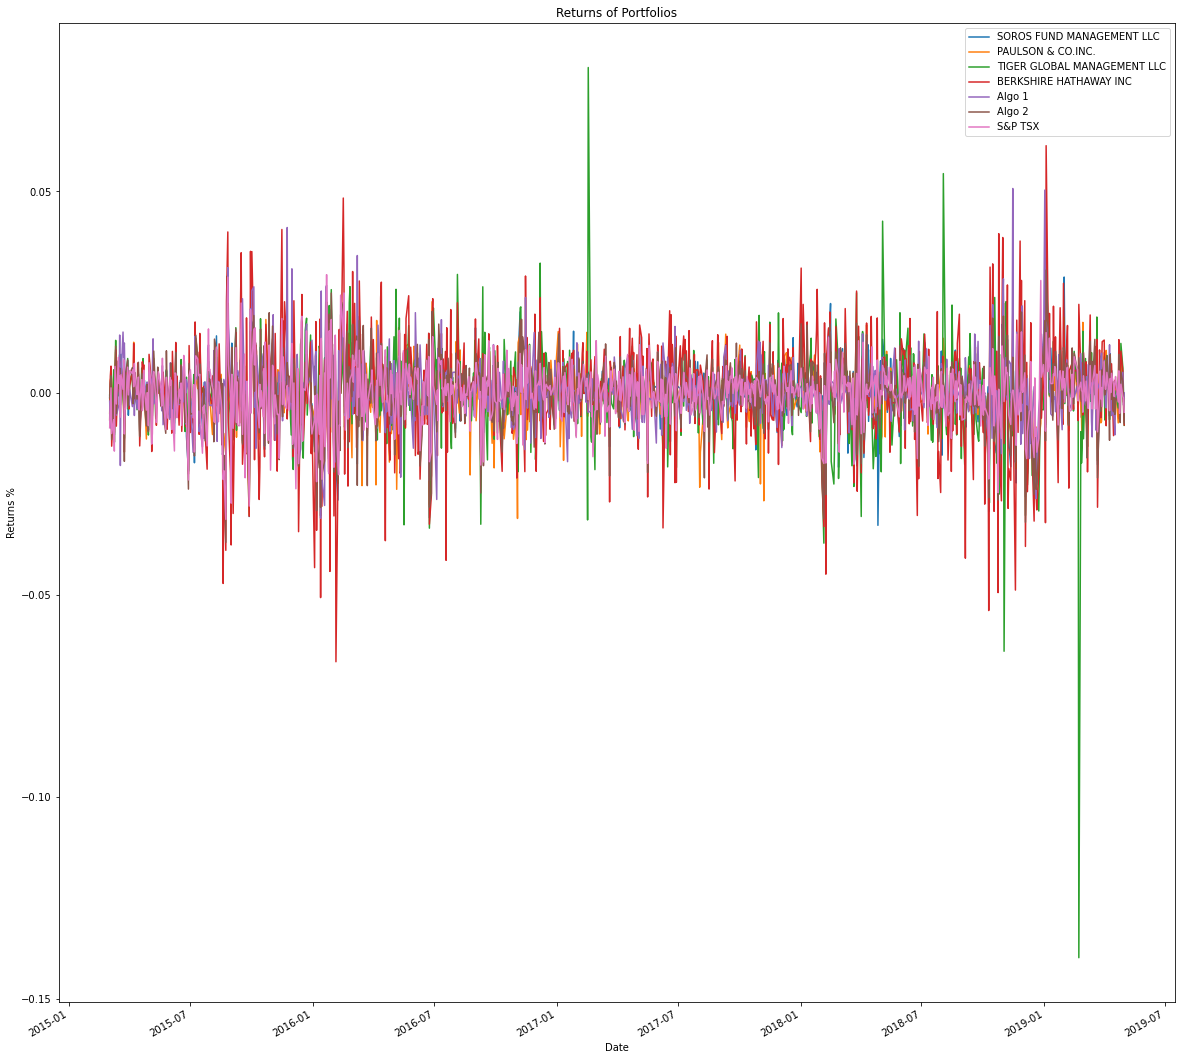

In [400]:
# Plot daily returns of all portfolios
ax1 = final_set.plot( x = 'Date', kind = 'line', title = 'Returns of Portfolios', figsize =(20,20))
ax1.set(ylabel = "Returns %")

#### Calculate and Plot cumulative returns.

[Text(0, 0.5, 'Cumulative Returns %')]

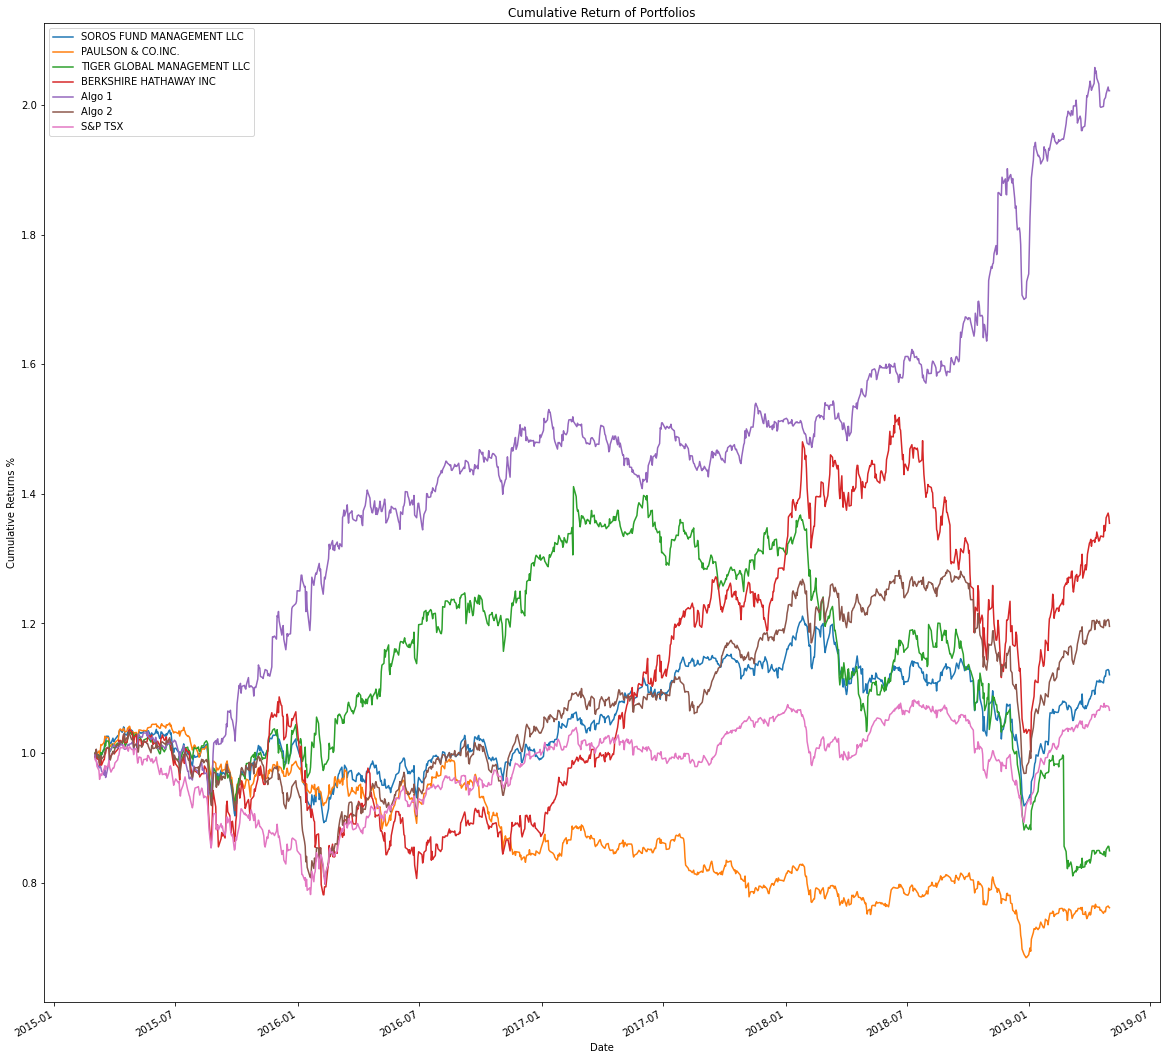

In [401]:
# Calculate cumulative returns of all portfolios

#ENSURE TO RUN ALL ABOVE CELLS BEFORE RUNNING THIS CELL, ELSE YOU GET JUNK VALUE OUTPUT
final_set_cumulative = final_set.copy()
final_set_cumulative['Algo 1'] = (1+final_set['Algo 1']).cumprod()
final_set_cumulative['Algo 2'] = (1+final_set['Algo 2']).cumprod()
final_set_cumulative['SOROS FUND MANAGEMENT LLC'] = (1+final_set['SOROS FUND MANAGEMENT LLC']).cumprod()

#This column header has a blank space in the end
final_set_cumulative['PAULSON & CO.INC. '] = (1+final_set['PAULSON & CO.INC. ']).cumprod()

final_set_cumulative['TIGER GLOBAL MANAGEMENT LLC'] = (1+final_set['TIGER GLOBAL MANAGEMENT LLC']).cumprod()
final_set_cumulative['BERKSHIRE HATHAWAY INC'] = (1+final_set['BERKSHIRE HATHAWAY INC']).cumprod()
final_set_cumulative['S&P TSX'] = (1+final_set['S&P TSX']).cumprod()

#final_set_cumulative.head() debug

# Plot cumulative returns
#AGIAN, RUN ALL ABOVE CELLS BEFORE RUNNING THIS CELL ELSE YOU GET JUNK VALUES
ax2 = final_set_cumulative.plot(x = 'Date', kind ='line', title ='Cumulative Return of Portfolios', figsize = (20,20))
ax2.set(ylabel = "Cumulative Returns %")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


[Text(0, 0.5, 'Cumulative Returns'),
 Text(0.5, 1.0, 'Box Plot of Cumulative Returns')]

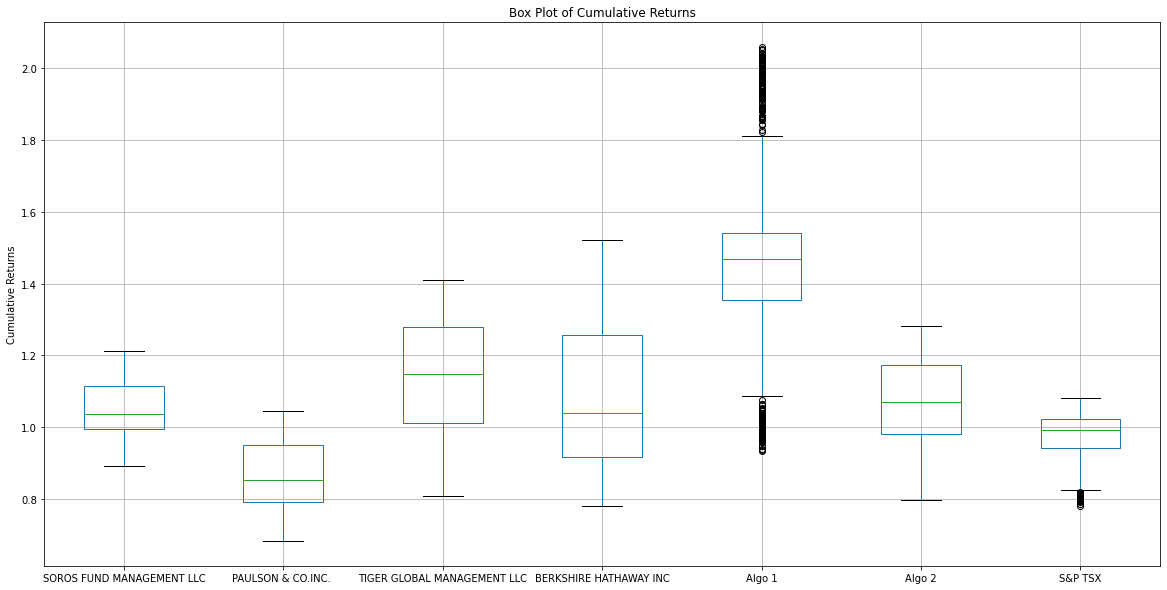

In [402]:
# Box plot to visually show risk
boxplot = final_set_cumulative.boxplot(figsize = (20,10))
boxplot.set(ylabel = "Cumulative Returns", title = "Box Plot of Cumulative Returns")

### Calculate Standard Deviations

In [403]:
# Calculate the daily standard deviations of all portfolios
final_set_index = final_set.set_index('Date')
daily_std = final_set_index.std()
daily_std_sorted = daily_std.sort_values()
daily_std_sorted
#final_set_index

PAULSON & CO.INC.              0.006982
S&P TSX                        0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [404]:
# Calculate  the daily standard deviation of S&P TSX 60
#already caluclated in the above

# Determine which portfolios are riskier than the S&P TSX 60
#all portfolios except Paulson


### Calculate the Annualized Standard Deviation

In [405]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std.sort_values()

PAULSON & CO.INC.              0.110841
S&P TSX                        0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

[Text(0, 0.5, ' Portfolio Standard Deviations'),
 Text(0.5, 1.0, 'Rolling 21 Day Portfolio Standard Deviations')]

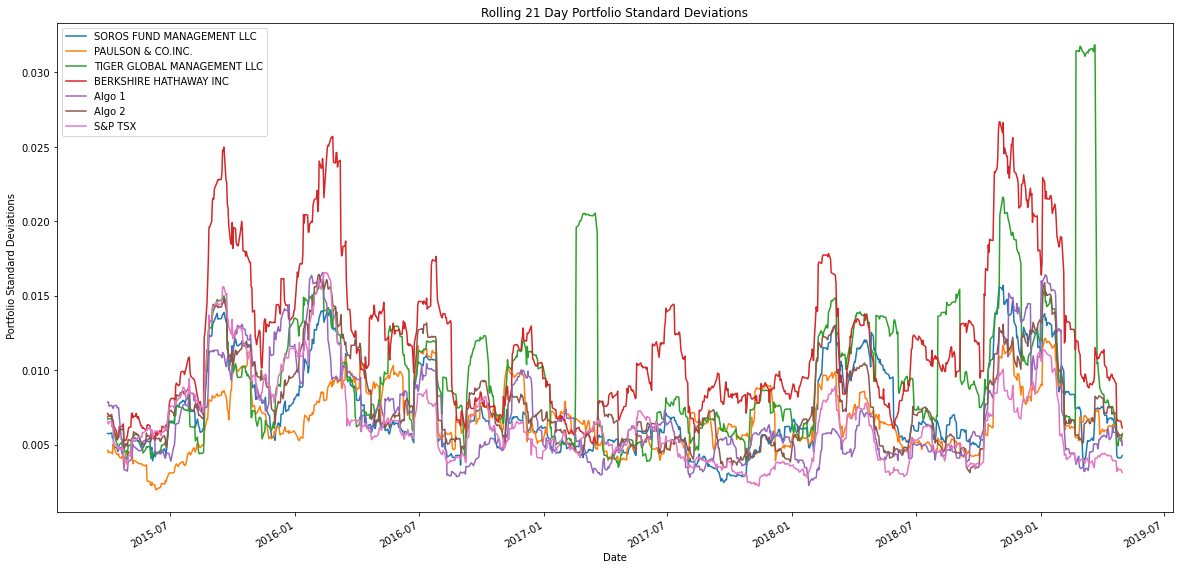

In [406]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = final_set_index.rolling(21).std()
#rolling_std debug check

# Plot the rolling standard deviation
del ax1
ax1 = rolling_std.plot(figsize = (20,10))
ax1.set(ylabel = " Portfolio Standard Deviations", title = "Rolling 21 Day Portfolio Standard Deviations")


### Calculate and plot the correlation

In [407]:
# Calculate the correlation
final_set_corr = final_set_index.corr()

# Display de correlation matrix
final_set_corr


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60 day Beta for Algo 1'}, xlabel='Date', ylabel='Beta'>

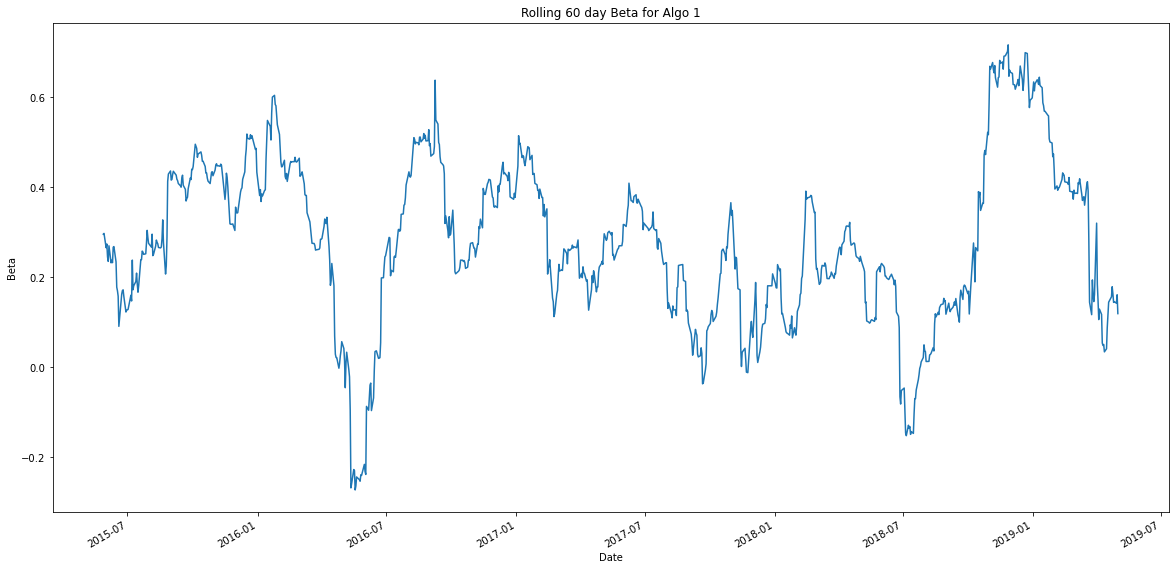

In [408]:
# Calculate covariance of a single portfolio

#Ploting covariance of each portfolio with SP TSX
covar_a1 = final_set_index["Algo 1"].rolling(window = 60).cov(final_set_index["S&P TSX"])


# Calculate variance of S&P TSX
var_tsx= final_set_index["S&P TSX"].rolling(window = 60).var()

# Computing beta
rolling_algo1_beta = covar_a1/var_tsx


# Plot beta trend
rolling_algo1_beta.plot(figsize = (20,10), ylabel = "Beta", title = "Rolling 60 day Beta for Algo 1")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [409]:
# Use `ewm` to calculate the rolling window
final_set_ewm = final_set_index.ewm(halflife = 21)

final_set_ewm.mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436
...,...,...,...,...,...,...,...
2019-04-25,0.001277,0.000032,-0.001058,0.001860,0.000625,0.000876,0.001018
2019-04-26,0.001500,0.000329,-0.000622,0.002138,0.000702,0.001018,0.001058
2019-04-29,0.001492,0.000406,-0.000399,0.002238,0.000848,0.001077,0.000998


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [410]:
# Annualized Sharpe Ratios
#Assumption - The Risk Free returns file is not provided. Therefore assuming risk free rate is S&P TSX

sharpe_ratios = ((final_set_index.mean()-final_set_index['S&P TSX'].mean())*252)/(final_set_index.std()*np.sqrt(252))
#final_set_index
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
S&P TSX                        0.000000
SOROS FUND MANAGEMENT LLC      0.110980
Algo 2                         0.231615
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
dtype: float64

<AxesSubplot:ylabel='Sharpe Ratio'>

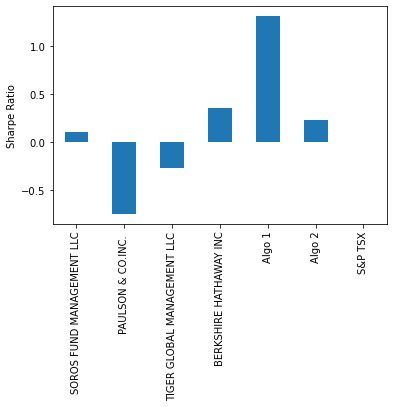

In [411]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', ylabel = 'Sharpe Ratio')


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo1 outperforms all benchmarks.
Algo2 outperforms all benchmarks except Berkshire

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [412]:
# Reading data from 1st stock
shopify_data = Path(r'C:\Users\Sobha\Desktop\Uoft\Homework\unit_four_homework\resources\shop_historical.csv')

shopify = pd.read_csv(shopify_data, index_col ="Date", parse_dates = True)
shopify.rename(columns = {"Close":"SHOP"},inplace = True)
shopify.drop(columns=['Symbol'], inplace = True)
shopify

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
...,...
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39


In [413]:
# Reading data from 2nd stock
otex_data = Path(r'C:\Users\Sobha\Desktop\Uoft\Homework\unit_four_homework\resources\otex_historical.csv')

otex = pd.read_csv(otex_data, index_col ="Date", parse_dates = True)
otex.rename(columns = {"Close":"OTEX"}, inplace = True)
otex.drop(columns = ['Symbol'], inplace = True)
otex

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
...,...
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44


In [414]:
# Reading data from 3rd stock
loblaw_data = Path(r'C:\Users\Sobha\Desktop\Uoft\Homework\unit_four_homework\resources\l_historical.csv')

loblaw = pd.read_csv(loblaw_data, index_col ="Date", parse_dates = True)
loblaw.rename(columns = {"Close": "L"}, inplace = True)
loblaw.drop(columns = ['Symbol'], inplace = True)
loblaw

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
...,...
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67


In [415]:
# Combine all stocks in a single DataFrame
custom_set = pd.concat([shopify,otex,loblaw], axis = 1, join = 'inner')
custom_set

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [416]:
# Reset Date index


In [417]:
# Reorganize portfolio data by having a column per symbol
#already done in the above custom_set

In [418]:
# Calculate daily returns
custom_set_returns =custom_set.pct_change()

#custom_set_returns debug check

# Drop NAs
custom_set_returns.dropna(inplace = True)

# Display sample data
custom_set_returns.head()

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [419]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_weighted_returns = custom_set_returns.dot(weights)

# Display sample data

temporary_data = pd.DataFrame(data = custom_weighted_returns)
temporary_data.rename(columns ={temporary_data.columns[0]:"WEIGHTED_RETURNS"}, inplace = True)
temporary_data

,WEIGHTED_RETURNS
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999
...,...
2019-12-20,0.007495
2019-12-23,-0.006607
2019-12-24,0.006331


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [420]:
# Join your returns DataFrame to the original returns DataFrame
custom_set_returns = pd.concat([custom_set_returns,temporary_data], axis = 1, join = 'inner')
custom_set_returns.isnull().sum()


SHOP                0
OTEX                0
L                   0
WEIGHTED_RETURNS    0
dtype: int64

In [421]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#No nulls in above check
custom_set_returns.sort_index(inplace = True)
custom_set_returns.head()

,SHOP,OTEX,L,WEIGHTED_RETURNS
Date,,,,
2018-01-03,0.023398,-0.011703,-0.010002,0.000565
2018-01-04,0.017092,-0.003715,0.000174,0.004517
2018-01-05,-0.001455,-0.007924,0.000000,-0.003126
2018-01-08,0.016392,-0.009631,-0.009753,-0.000997
2018-01-09,-0.011254,-0.000712,0.008969,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [422]:
# Calculate the annualized `std`
custom_annual_std = custom_set_returns.std()*np.sqrt(252)
custom_annual_std.sort_values()


L                   0.152369
OTEX                0.215132
WEIGHTED_RETURNS    0.216794
SHOP                0.488717
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date', ylabel='Standard Deviation'>

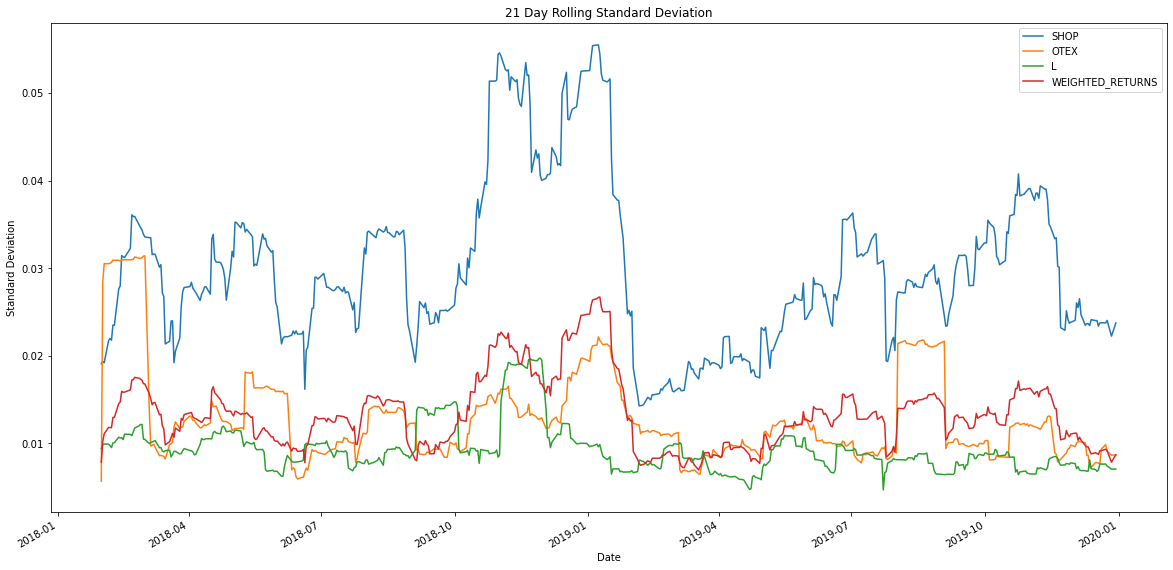

In [423]:
# Calculate rolling standard deviation
custom_rolling_std = custom_set_returns.rolling(window = 21).std()

# Plot rolling standard deviation
custom_rolling_std.plot(figsize = (20,10), ylabel = "Standard Deviation", title = "21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

<AxesSubplot:>

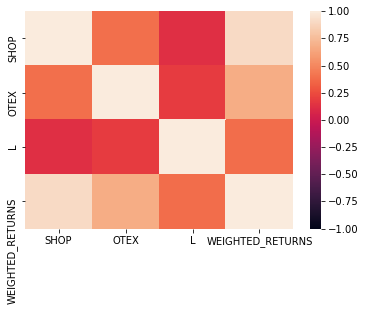

In [424]:
# Calculate and plot the correlation
import seaborn as sns
custom_set_corr = custom_set_returns.corr()
sns.heatmap(custom_set_corr, vmin = -1, vmax = 1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60 Day Beta'}, xlabel='Date', ylabel='Beta'>

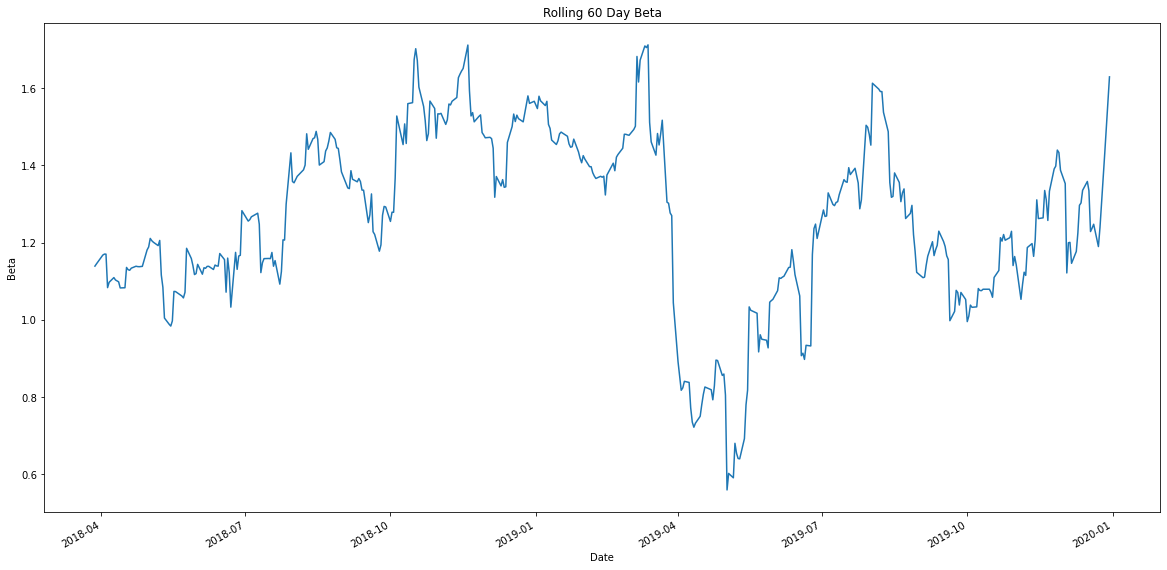

In [425]:
# Calculate and plot Beta
tsx_returns_clean.set_index('Date', inplace = True)

#bring SPTSX also into the table
custom_set_benchmark = pd.concat([custom_set_returns, tsx_returns_clean], axis = 1, join = 'inner')

#custom_set_benchmark debug check

custom_covar = custom_set_benchmark['WEIGHTED_RETURNS'].rolling(window = 60).cov(custom_set_benchmark['S&P TSX'])
del var_tsx
var_tsx = custom_set_benchmark['S&P TSX'].rolling(window = 60).var()

custom_beta = custom_covar/var_tsx
custom_beta.plot(ylabel = "Beta", title = "Rolling 60 Day Beta", figsize = (20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [426]:
# Calculate Annualzied Sharpe Ratios
custom_sharp_ratios = ((custom_set_benchmark.mean() - custom_set_benchmark['S&P TSX'].mean())*252)/(custom_set_benchmark.std()*np.sqrt(252))
custom_sharp_ratios.sort_values()

S&P TSX             0.000000
L                   0.386742
OTEX                0.613658
WEIGHTED_RETURNS    1.494643
SHOP                1.598352
dtype: float64

<AxesSubplot:ylabel='Sharpe Ratios'>

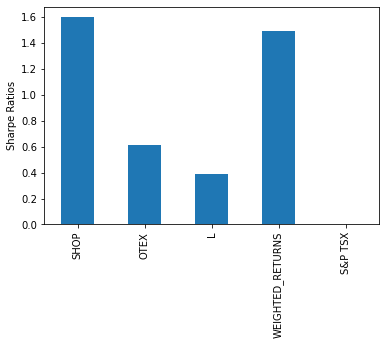

In [427]:
# Visualize the sharpe ratios as a bar plot
custom_sharp_ratios.plot(kind = 'bar', ylabel = "Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

Portfolio is second best overall after SHOP